In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data  = pd.read_csv('/kaggle/input/cancer-data/Cancer_Data.csv', encoding='Latin-1')

In [ ]:
data.info()
data.describe()

In [ ]:
data.head()

In [ ]:
data.isnull().sum()

**1. Diagnosis Distribution( Maligant  vs  Benign )**

In [ ]:
diagnosis_counts = data['diagnosis'].value_counts()
diagnosis_counts.index = diagnosis_counts.index.map({'B': 'Benign', 'M': 'Malignant'})
diagnosis_df = diagnosis_counts.reset_index()
diagnosis_df.columns = ['Diagnosis', 'Count']
print(diagnosis_df)

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Diagnosis', y='Count', data=diagnosis_df, palette='viridis')
plt.title('Diagnosis Counts')
plt.show()


### Observation

Our findings show that there are significantly more cases with a Benign diagnosis (357) than those with a Malignant diagnosis (212).


**2. Overall Averages of radius_mean , texture_mean ,perimeter_mean, area_mean, smoothness_mean,compactness_mean,concavity_mean,concave points_mean,  symmetry_mean,fractal_dimension_mean By Type of Diagnosis**

In [ ]:
data['diagnosis'] = data['diagnosis'].map({'B': 'Benign', 'M': 'Malignant'})
averages = data.groupby('diagnosis')[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']].mean().reset_index()
print('Averages')
df = pd.DataFrame(averages)
df


In [ ]:
averages = data.groupby('diagnosis')[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']].mean().reset_index()
df = pd.DataFrame(averages)
df_box = df.melt(id_vars='diagnosis', var_name='Feature', value_name='Average')
plt.figure(figsize=(14, 8))
sns.boxplot(x='Feature', y='Average', hue='diagnosis', data=df_box, palette='Set2', linewidth=1.2)
plt.title('Distribution of Features by Diagnosis', fontsize=16)
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.legend(title='Diagnosis', title_fontsize='13', fontsize='11')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Observation

Malignant diagnoses exhibit significantly higher average values in all key factors compared to Benign diagnoses, indicating that Malignant tumors are more likely to spread more.


**3. Medians of all the given features to understand their central tendencies for both the diagnosis category**


In [ ]:
numeric_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
                    'smoothness_mean', 'compactness_mean', 'concavity_mean',
                    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
medians = data.groupby('diagnosis')[numeric_features].median().reset_index()
print('Meadians')
df = pd.DataFrame(medians)
df

### Observation

These median values illustrate that malignant tumors generally have higher values in features related to size and irregularity, such as radius, perimeter, area, compactness, and concavity, compared to benign tumors. This suggests that malignant tumors tend to be larger and more irregular in shape and texture.


****4. Standard Deviations of all the given features to understand how the values are being dispersed ****************

In [ ]:
std_devs = data.groupby('diagnosis')[numeric_features].std().reset_index()
print("Standard Deviations")
df = pd.DataFrame(std_devs)
df


In [ ]:
numeric_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
df_melted = data.melt(id_vars='diagnosis', value_vars=numeric_features, 
                      var_name='Feature', value_name='Value')
plt.figure(figsize=(16, 14))
sns.violinplot(x='Feature', y='Value', hue='diagnosis', data=df_melted, palette='viridis', split=True)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Distribution and Dispersion of Features by Diagnosis')
plt.xlabel('Feature',fontsize = 12)
plt.ylabel('Value')
plt.show()

### Observation

These Standard Deviation values help to understand not just the central tendencies (mean) but also the spread and variability of features for each diagnosis category, which can be crucial for developing better diagnostic models or understanding tumor characteristics.


**5. Correlation between the features/Variables given in the data to find out the direction and degree of the relationship between two features**

In [ ]:
correlation_matrix = data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
              'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

### Observations: 

- From the Correlation Matrix we can observe the relationship between the features:
  - Radius is positively correlated with Perimeter, Area, and Concave Points.
  - Radius is negatively correlated with Fractal Dimension.
  - This means that if Radius increases, Perimeter, Area, and Concave Points increase due to a strong positive relationship between them. 
  - On the other hand, Fractal Dimension (complexity of a pattern) decreases as Radius increases because they are negatively related.

- In the same way, from the Heatmap we can clearly understand the relationship between all the features.


**6. From taking a glance into correlation matrix we can understand that the radius,perimeterand area features are  having a strong positive  correlations with one other  which indeed shows that  they  the most important feature among the given features. So lets focus more on radius,perimeter and area features and dive deep into analysing their sub features like raduis_se, radius_mean and radius_worst in the same way for perimeter and area using pairplot**

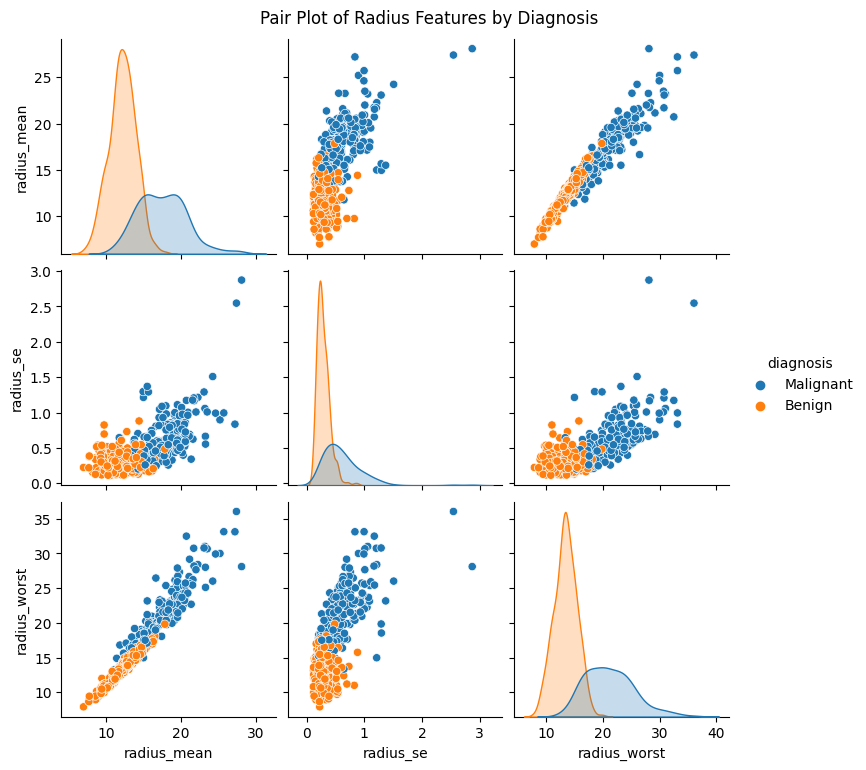

In [55]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
sns.pairplot(data[['radius_mean', 'radius_se', 'radius_worst', 'diagnosis']], hue='diagnosis')
plt.suptitle('Pair Plot of Radius Features by Diagnosis', y=1.02)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
sns.pairplot(data[['perimeter_mean', 'perimeter_se', 'perimeter_worst', 'diagnosis']], hue='diagnosis')
plt.suptitle('Pair Plot of Perimeter Features by Diagnosis', y=1.02)
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
sns.pairplot(data[['area_mean', 'area_se', 'area_worst', 'diagnosis']], hue='diagnosis')
plt.suptitle('Pair Plot of area Features by Diagnosis', y=1.02)
plt.show()

### Observations

- The Scatter plots explain the distribution of the data points and potential trends and insights.
- From all the three pairplots, we can observe that the three features—radius, perimeter, and area—are almost the same, which shows how strongly they are related to one another.
- The distribution of `radius_mean`, `radius_worst`, `perimeter_mean`, `perimeter_worst`, `area_mean`, and `area_worst` are right-skewed with a longer tail towards higher values, whereas the distribution of `radius_se`, `perimeter_se`, and `area_se` are symmetrical.
- `radius_mean`, `radius_worst`, `perimeter_mean`, `perimeter_worst`, `area_mean`, and `area_worst` appear to be positively correlated, as one increases, the others increase as well. In contrast, `radius_se`, `perimeter_se`, and `area_se` are not as strongly related to the other features.


**7. Now lets dive in deep by building an model predicting the feauture importance using RandomForestClassifier**

In [ ]:

from sklearn.ensemble import RandomForestClassifier
X = data[['radius_mean', 'radius_se', 'radius_worst', 'perimeter_mean', 'perimeter_se', 'perimeter_worst','area_mean','area_se','area_worst']]
y = data['diagnosis']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

### Observations

- By using the `RandomForestClassifier`, we can observe that `radius_worst`, `perimeter_worst`, and `area_worst` are the most influential features on the model's decision-making, as they have the highest importance values. `perimeter_mean`, `radius_mean`, and `area_mean` are shown as the next most important features according to the `RandomForestClassifier`'s feature importance.
- In contrast, `area_se`, `perimeter_se`, and `radius_se` have the least importance.


***8. Lets finally visualize the features according to their importance ***

In [ ]:
plt.figure(figsize=(10, 10))
colors = plt.cm.Pastel1(np.linspace(0, 1, len(importance_df)))
plt.pie(importance_df['Importance'], labels=importance_df['Feature'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Feature Importances from Random Forest Model')
plt.show()

### Conclusion

We can finally conclude that `radius_worst` is the most influential feature among all the features.The model relies heavily on this feature to make accurate prediction
